## lifecycle of datascience project:
1.EDA    
2.handling missing values handling imbalanced data               
3.treating outliers                 
4.scalling data                    
5.converting features                       
6.correlation: tests                 
7.feature selection                 
8.model creation                 
9.model deployment                 
10.hyperparameter tunning                   
11.increamental learning                    
    

### why are there missing values:
> human error, calculation error ,data no being available

### type of data:
>numerical:
>>descrete and contineous


>catagorical:
>>nominal and ordinal 

### types of missing data:
>missing completly at random(MCAR), 
>missing at random(MAR), 
>missing not at random(MNAR).

### technique to fill these values:
mean median mode.             
random sample imputation.                   
capturing nan in new feature.                      
end of distribution imputation .                    
arbitrary imputation .                 
frequent catagories imputation .                     
### technique to handle catagorical values
1.delete row                
2.replace with most frequent value                  
3.create an algo to predict catagories             
4.use colms for prediction of value           
5.make cluster of catagories and predict where it(data point) belongs

## mean median mode imputation

impute mean median or mode inplace of missing value use when data is missing completly at random(MCAR) 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
import numpy as np 

In [6]:
data["Age"].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [7]:
data["null_age"]=np.where(data["Age"].isnull(),1,0)

In [8]:
data["null_age"].mean()

0.19865319865319866

In [9]:
data.groupby(["Survived"])["null_age"].mean()

Survived
0    0.227687
1    0.152047
Name: null_age, dtype: float64

In [10]:
median = data.Age.median()

In [11]:
median

28.0

In [12]:
def imputenan(data,feature, val):
    data[feature+"_notnull"]=data[feature].fillna(val)
    

In [13]:
imputenan(data,"Age",median)

In [14]:
data.drop(["Pclass","Name","SibSp","Parch","Embarked","Ticket","PassengerId"],axis=1,inplace=True)

In [15]:
data.head()

,Survived,Sex,Age,Fare,Cabin,null_age,Age_notnull
0,0,male,22.0,7.2500,NaN,0,22.0
1,1,female,38.0,71.2833,C85,0,38.0
2,1,female,26.0,7.9250,NaN,0,26.0
3,1,female,35.0,53.1000,C123,0,35.0
4,0,male,35.0,8.0500,NaN,0,35.0


In [16]:
data.Age.std(),data.Age_notnull.std()

(14.526497332334042, 13.019696550973201)

In [17]:
import matplotlib.pyplot as plt
# %matplotlib inline

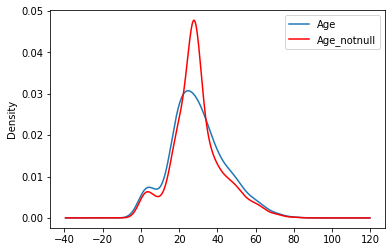

In [18]:
fig =plt.figure()
ax = fig.add_subplot(111)
data['Age'].plot(kind='kde', ax=ax)
data.Age_notnull.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### advantages
1.easy
2.not affected by outliers
3.fast to clean dataset
#### disadvantages
1.change in variance
2.impact correlation

## Random sample imputation

use when data is missing completly at random
drop missing value and use remaining values

In [19]:
df = data.drop(["Age_notnull","null_age"],axis=1)
df.head()

,Survived,Sex,Age,Fare,Cabin
0,0,male,22.0,7.2500,NaN
1,1,female,38.0,71.2833,C85
2,1,female,26.0,7.9250,NaN
3,1,female,35.0,53.1000,C123
4,0,male,35.0,8.0500,NaN


In [20]:
df.Age.isnull().sum()

177

In [21]:
# dropping all the missing values and sampling total values that are missing randomly 
sample = df["Age"].dropna().sample(df.Age.isnull().sum(),random_state=42)

In [22]:
sample

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: Age, Length: 177, dtype: float64

In [23]:
median= df.Age.median()
median

28.0

In [24]:
# this function creates 2 new feature age median and age rs
# also new random sample to fill na
# random sample is filled by combining their indexes
def impute_rs(df,feature,median):
    df[feature+"_median"]=df[feature].fillna(median)
    df[feature+"_rs"]=df[feature]
    random_sample=df[feature].dropna().sample(df.Age.isnull().sum(),random_state=42)
    random_sample.index=df[df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature+"_rs"]=random_sample
#     df[feature+"_rs"]=df[feature].fillna(random_sample)

In [25]:
impute_rs(df,"Age",median)

In [26]:
df

,Survived,Sex,Age,Fare,Cabin,Age_median,Age_rs
0,0,male,22.0,7.2500,NaN,22.0,22.0
1,1,female,38.0,71.2833,C85,38.0,38.0
2,1,female,26.0,7.9250,NaN,26.0,26.0
3,1,female,35.0,53.1000,C123,35.0,35.0
4,0,male,35.0,8.0500,NaN,35.0,35.0
...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,NaN,27.0,27.0
887,1,female,19.0,30.0000,B42,19.0,19.0
888,0,female,NaN,23.4500,NaN,28.0,52.0
889,1,male,26.0,30.0000,C148,26.0,26.0


In [27]:
print(df["Age"].std())

14.526497332334042


In [28]:
df.Age_rs.std()

14.295286948654619

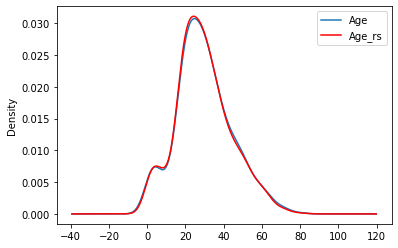

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind="kde",ax= ax)
df.Age_rs.plot(kind="kde",ax=ax, color = "red")
lines, lables= ax.get_legend_handles_labels()
ax.legend(lines,lables, loc="best")

### advantages
1.easy
2.variance is not distorted
### disadvantages
1.do you think randomness will work everywhere?

## capturing nan with new feature
use when data is not missing randomly(mnar)

In [34]:
df = pd.read_csv("titanic.csv", usecols=["Age","Cabin","Survived"])

In [35]:
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


In [41]:
df["null_age"]= np.where(df["Age"].isnull(),1,0)

In [44]:
df.null_age.sum()

177

In [45]:
df.fillna(df.Age.median(),inplace=True)

In [47]:
df.head(10)

,Survived,Age,Cabin,null_age
0,0,22.0,28.0,0
1,1,38.0,C85,0
2,1,26.0,28.0,0
3,1,35.0,C123,0
4,0,35.0,28.0,0
5,0,28.0,28.0,1
6,0,54.0,E46,0
7,0,2.0,28.0,0
8,1,27.0,28.0,0
9,1,14.0,28.0,0


### advantages 
1. easy       
2. captures importance of missing values    

### disadvantages
1. more features are added this may lead to curse of dimensionality 

## end of distribution imputation 

In [49]:
df = pd.read_csv("titanic.csv",usecols=["Survived","Age","Cabin"])

In [50]:
df

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN
...,...,...,...
886,0,27.0,NaN
887,1,19.0,B42
888,0,NaN,NaN
889,1,26.0,C148


<AxesSubplot:>

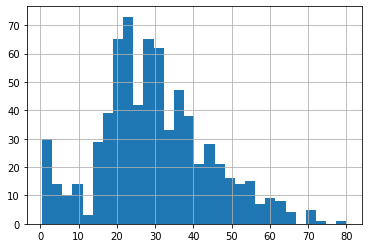

In [56]:
df.Age.hist(bins=30)

In [57]:
outliers = df.Age.mean()+3*df.Age.std()

In [58]:
outliers

73.27860964406094

In [61]:
#!pip install seaborn
import seaborn as sns

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

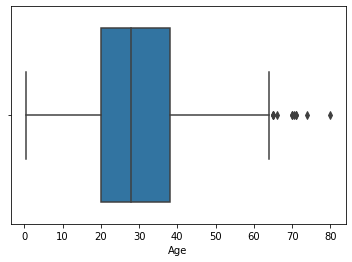

In [64]:
sns.boxplot("Age",data=df)

In [67]:
def outlier_imputer(df, feature, val):
    df[feature+"_outlier"]=df[feature].fillna(val)
    df[feature]= df[feature].fillna(df[feature].median())

In [68]:
outlier_imputer(df,"Age",outliers)

In [69]:
df

,Survived,Age,Cabin,Age_outlier
0,0,22.0,NaN,22.00000
1,1,38.0,C85,38.00000
2,1,26.0,NaN,26.00000
3,1,35.0,C123,35.00000
4,0,35.0,NaN,35.00000
...,...,...,...,...
886,0,27.0,NaN,27.00000
887,1,19.0,B42,19.00000
888,0,28.0,NaN,73.27861
889,1,26.0,C148,26.00000


<AxesSubplot:>

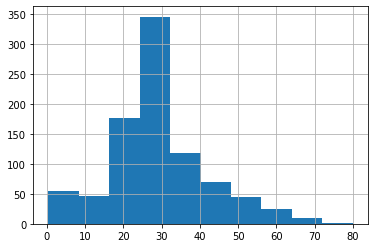

In [71]:
df.Age.hist()

<AxesSubplot:>

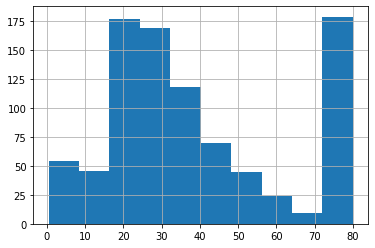

In [72]:
df.Age_outlier.hist()

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_outlier'>

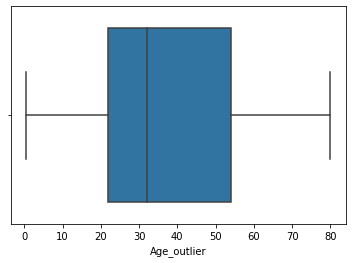

In [73]:
sns.boxplot("Age_outlier",data=df)

### advantages 
1.easy       
2.capture importance of missing value        
### disadvantages
1.distort distribution        
2.if na is large then it mask distribution          
3.if na is small then it will be treated as outliers

## Arbitrary value imputation 
use of this method depend on the data we are dealing with                              
originally used in kaggle competition                       

note filled value should not be present frequently 

In [76]:
df = pd.read_csv("titanic.csv",usecols=["Survived","Age","Cabin"])

In [77]:
df.head()

,Survived,Age,Cabin
0,0,22.0,NaN
1,1,38.0,C85
2,1,26.0,NaN
3,1,35.0,C123
4,0,35.0,NaN


<AxesSubplot:>

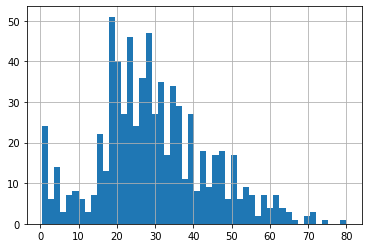

In [81]:
df.Age.hist(bins=50)

In [84]:
def impute_arbitrary(df,feature):
    df[feature+"_arbitrary"]=df[feature].fillna(5)
    df[feature+"_extreme"]= df[feature].fillna(75)

In [86]:
impute_arbitrary(df,"Age")

In [87]:
df.head()

,Survived,Age,Cabin,Age_arbitrary,Age_extreme
0,0,22.0,NaN,22.0,22.0
1,1,38.0,C85,38.0,38.0
2,1,26.0,NaN,26.0,26.0
3,1,35.0,C123,35.0,35.0
4,0,35.0,NaN,35.0,35.0


<AxesSubplot:>

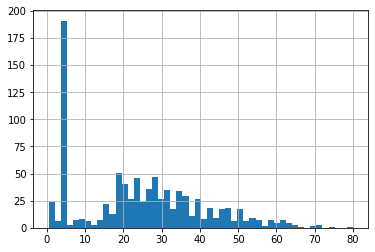

In [90]:
df.Age_arbitrary.hist(bins=50)

<AxesSubplot:>

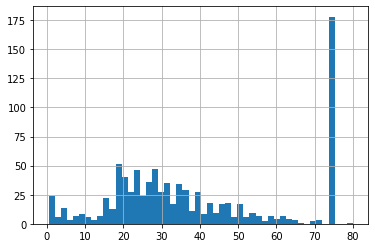

In [91]:
df.Age_extreme.hist(bins=50)

# advantages 
1.easy     
2.capture importance         
## disadvantages
1.distortion           
2.hard to find a perfect arbitrary value

## frequent catagories imputation 

check for occurance of catagories in distribution 

In [154]:
df = pd.read_csv("housing_train_set.csv",usecols=["BsmtQual","FireplaceQu","SalePrice"])

In [155]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [156]:
df.head()

,BsmtQual,FireplaceQu,SalePrice
0,Gd,NaN,208500
1,Gd,TA,181500
2,Gd,TA,223500
3,TA,Gd,140000
4,Gd,TA,250000


In [157]:
df.isnull().value_counts()

BsmtQual  FireplaceQu  SalePrice
False     False        False        761
          True         False        662
True      True         False         28
          False        False          9
dtype: int64

In [160]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
SalePrice        0
dtype: int64

In [161]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [162]:
def frequency(df,var):
    df[var].value_counts().plot.bar()

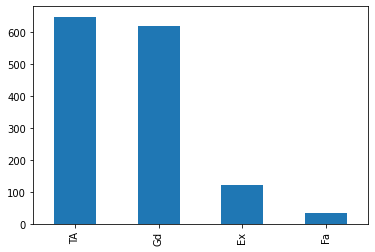

In [165]:
frequency(df,"BsmtQual")


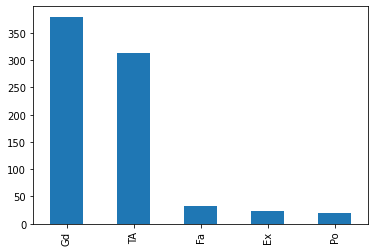

In [166]:
frequency(df,"FireplaceQu")

In [181]:
df["FireplaceQu"].value_counts().mode()

0     20
1     24
2     33
3    313
4    381
dtype: int64

In [180]:
df["FireplaceQu"].mode()[0]

'Gd'

In [182]:
df["BsmtQual"].mode()[0]

'TA'

In [183]:
#imputing function 
def impute_cat(df,feature):
    df[feature]=df[feature].fillna(df[feature].mode()[0]) 

In [184]:
impute_cat(df,"BsmtQual")

In [185]:
impute_cat(df,"FireplaceQu")

In [186]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
SalePrice      0
dtype: int64

<AxesSubplot:>

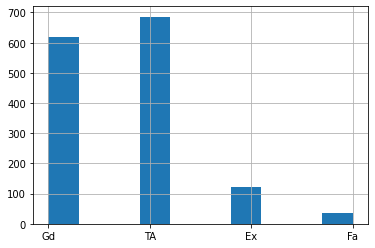

In [187]:
df.BsmtQual.hist()

## advantages
1.easy              
2.fast               
## disadvantages
1.biasness             
2.distort the relation betn most frequent label

## creating new feature to capture nan value

In [201]:
df = pd.read_csv("housing_train_set.csv")

In [204]:
df["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [202]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [190]:
import numpy as np

In [191]:
def new_feature(df,variable):
    df[variable+"_new"]=np.where(df[variable].isnull(),1,0)

In [205]:
for i in ["Fence"]:
    new_feature(df,i)

In [209]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Fence_new
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [210]:
df["Fence_new"]

0       1
1       1
2       1
3       1
4       1
       ..
1455    1
1456    0
1457    0
1458    1
1459    1
Name: Fence_new, Length: 1460, dtype: int32

#### we can replace nan values with new catagory

In [211]:
 df=pd.read_csv("housing_train_set.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [212]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [213]:
def new_var(df,feature):
    df[feature+"_newvar"]=np.where(df[feature].isnull(),"missing value",df[feature])

In [215]:
for i in ["FireplaceQu","GarageType","BsmtQual"]:
    new_var(df,i)

In [216]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_newvar,GarageType_newvar,BsmtQual_newvar
0,Gd,NaN,Attchd,208500,missing value,Attchd,Gd
1,Gd,TA,Attchd,181500,TA,Attchd,Gd
2,Gd,TA,Attchd,223500,TA,Attchd,Gd
3,TA,Gd,Detchd,140000,Gd,Detchd,TA
4,Gd,TA,Attchd,250000,TA,Attchd,Gd


In [217]:
df=df.drop(["FireplaceQu","GarageType","BsmtQual"],axis=1)

In [218]:
df.head()

,SalePrice,FireplaceQu_newvar,GarageType_newvar,BsmtQual_newvar
0,208500,missing value,Attchd,Gd
1,181500,TA,Attchd,Gd
2,223500,TA,Attchd,Gd
3,140000,Gd,Detchd,TA
4,250000,TA,Attchd,Gd
